In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
heart = pd.read_csv("heart.csv")

In [14]:
heart.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [15]:
%matplotlib inline

In [16]:
heart.corr()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
Age,1.000000,0.254399,-0.095282,0.198039,-0.382045,0.258612,0.282039
RestingBP,0.254399,1.000000,0.100893,0.070193,-0.112135,0.164803,0.107589
Cholesterol,-0.095282,0.100893,1.000000,-0.260974,0.235792,0.050148,-0.232741
FastingBS,0.198039,0.070193,-0.260974,1.000000,-0.131438,0.052698,0.267291
MaxHR,-0.382045,-0.112135,0.235792,-0.131438,1.000000,-0.160691,-0.400421
Oldpeak,0.258612,0.164803,0.050148,0.052698,-0.160691,1.000000,0.403951
HeartDisease,0.282039,0.107589,-0.232741,0.267291,-0.400421,0.403951,1.000000


<AxesSubplot:>

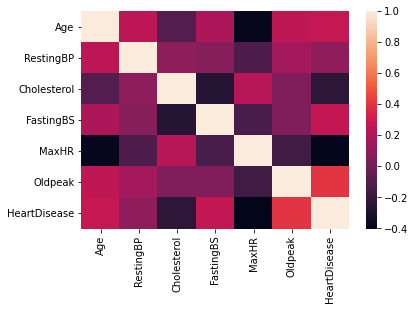

In [17]:
sns.heatmap(heart.corr())

<AxesSubplot:xlabel='ChestPainType', ylabel='count'>

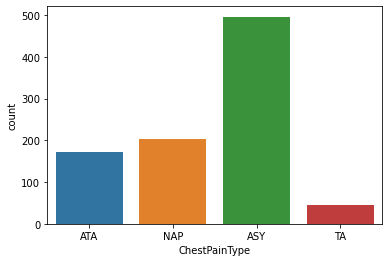

In [18]:
sns.countplot(x="ChestPainType" ,data=heart)

<AxesSubplot:xlabel='ChestPainType', ylabel='HeartDisease'>

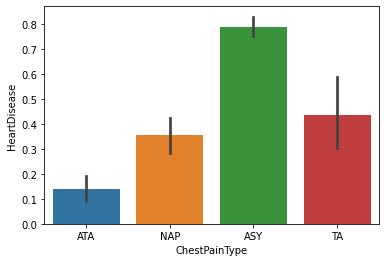

In [19]:
sns.barplot(x="ChestPainType",y="HeartDisease",data=heart)

In [20]:
#Categorical data to be converted to numerical data

In [21]:
heart["ChestPainType"].unique()

array(['ATA', 'NAP', 'ASY', 'TA'], dtype=object)

In [22]:
heart["RestingECG"].unique()

array(['Normal', 'ST', 'LVH'], dtype=object)

In [23]:
heart["ST_Slope"].unique()

array(['Up', 'Flat', 'Down'], dtype=object)

In [24]:
#checking for any null values in dataset

In [25]:
col_name = [col for col in heart.columns if heart[col].isnull().any()]

In [26]:
col_name

[]

In [27]:
# no Null values present. 


In [28]:
#converting categorical data to numeric data 

In [29]:
from sklearn.preprocessing import LabelEncoder

In [30]:
label=LabelEncoder()

In [31]:
heart['ChestPainType_numeric']=label.fit_transform(heart['ChestPainType'])
heart['ChestPainType_numeric']

0      1
1      2
2      1
3      0
4      2
      ..
913    3
914    0
915    0
916    1
917    2
Name: ChestPainType_numeric, Length: 918, dtype: int32

In [32]:
heart['RestingECG_numeric']=label.fit_transform(heart['RestingECG'])
heart['RestingECG_numeric']

0      1
1      1
2      2
3      1
4      1
      ..
913    1
914    1
915    1
916    0
917    1
Name: RestingECG_numeric, Length: 918, dtype: int32

In [33]:
heart['ST_Slope_numeric']=label.fit_transform(heart['ST_Slope'])
heart['ST_Slope_numeric']

0      2
1      1
2      2
3      1
4      2
      ..
913    1
914    1
915    1
916    1
917    2
Name: ST_Slope_numeric, Length: 918, dtype: int32

In [34]:
heart.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,ChestPainType_numeric,RestingECG_numeric,ST_Slope_numeric
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0,1,1,2
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1,2,1,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0,1,2,2
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1,0,1,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0,2,1,2


In [35]:
#droping categorical attributes as we have numeric values.

In [36]:
heart.drop('ChestPainType', axis=1,inplace=True)

In [37]:
heart.drop('RestingECG', axis=1,inplace=True)

In [38]:
heart.drop('ST_Slope', axis=1,inplace=True)

In [39]:
heart.head()

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,HeartDisease,ChestPainType_numeric,RestingECG_numeric,ST_Slope_numeric
0,40,M,140,289,0,172,N,0.0,0,1,1,2
1,49,F,160,180,0,156,N,1.0,1,2,1,1
2,37,M,130,283,0,98,N,0.0,0,1,2,2
3,48,F,138,214,0,108,Y,1.5,1,0,1,1
4,54,M,150,195,0,122,N,0.0,0,2,1,2


In [50]:
heart.Sex=heart.Sex.replace({'M':0,'F':1})

In [51]:
heart.ExerciseAngina=heart.ExerciseAngina.replace({'N':0,'Y':1})

In [55]:
X=heart.drop('HeartDisease',axis=1).values

In [56]:
y=heart['HeartDisease'].values

In [57]:
from sklearn.model_selection import train_test_split

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [59]:
import tensorflow as tf

In [60]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


In [61]:
from tensorflow.keras.layers import Activation

In [62]:
model = Sequential()

model.add(Dense(units=30,activation='relu'))

model.add(Dense(units=15,activation='relu'))

model.add(Dense(units=1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam')

In [63]:
model.fit(X_train,y_train, epochs=300, validation_data=(X_test,y_test),verbose=1)

Epoch 1/300
21/21 [==============================] - 0s 22ms/step - loss: 3.6538 - val_loss: 2.2658
Epoch 2/300
21/21 [==============================] - 0s 5ms/step - loss: 1.8872 - val_loss: 1.1829
Epoch 3/300
21/21 [==============================] - 0s 5ms/step - loss: 0.9968 - val_loss: 0.6988
Epoch 4/300
21/21 [==============================] - 0s 5ms/step - loss: 0.7558 - val_loss: 0.6689
Epoch 5/300
21/21 [==============================] - 0s 5ms/step - loss: 0.6756 - val_loss: 0.6478
Epoch 6/300
21/21 [==============================] - 0s 5ms/step - loss: 0.6150 - val_loss: 0.6277
Epoch 7/300
21/21 [==============================] - 0s 5ms/step - loss: 0.6248 - val_loss: 0.6462
Epoch 8/300
21/21 [==============================] - 0s 5ms/step - loss: 0.6124 - val_loss: 0.6593
Epoch 9/300
21/21 [==============================] - 0s 6ms/step - loss: 0.6511 - val_loss: 0.5890
Epoch 10/300
21/21 [==============================] - 0s 7ms/step - loss: 0.5816 - val_loss: 0.5860
Epoch 11

21/21 [==============================] - 0s 3ms/step - loss: 0.3861 - val_loss: 0.4355
Epoch 84/300
21/21 [==============================] - 0s 3ms/step - loss: 0.3814 - val_loss: 0.4330
Epoch 85/300
21/21 [==============================] - 0s 4ms/step - loss: 0.3835 - val_loss: 0.4173
Epoch 86/300
21/21 [==============================] - 0s 3ms/step - loss: 0.4362 - val_loss: 0.4265
Epoch 87/300
21/21 [==============================] - 0s 4ms/step - loss: 0.3703 - val_loss: 0.4025
Epoch 88/300
21/21 [==============================] - 0s 4ms/step - loss: 0.3865 - val_loss: 0.3929
Epoch 89/300
21/21 [==============================] - 0s 3ms/step - loss: 0.3766 - val_loss: 0.4238
Epoch 90/300
21/21 [==============================] - 0s 3ms/step - loss: 0.3824 - val_loss: 0.4139
Epoch 91/300
21/21 [==============================] - 0s 3ms/step - loss: 0.3914 - val_loss: 0.3885
Epoch 92/300
21/21 [==============================] - 0s 3ms/step - loss: 0.3830 - val_loss: 0.4004
Epoch 93/300


21/21 [==============================] - 0s 6ms/step - loss: 0.3829 - val_loss: 0.4015
Epoch 165/300
21/21 [==============================] - 0s 6ms/step - loss: 0.3450 - val_loss: 0.4100
Epoch 166/300
21/21 [==============================] - 0s 6ms/step - loss: 0.3681 - val_loss: 0.3680
Epoch 167/300
21/21 [==============================] - 0s 6ms/step - loss: 0.3689 - val_loss: 0.3544
Epoch 168/300
21/21 [==============================] - 0s 6ms/step - loss: 0.3475 - val_loss: 0.3786
Epoch 169/300
21/21 [==============================] - 0s 6ms/step - loss: 0.3400 - val_loss: 0.3817
Epoch 170/300
21/21 [==============================] - 0s 6ms/step - loss: 0.3508 - val_loss: 0.3764
Epoch 171/300
21/21 [==============================] - 0s 6ms/step - loss: 0.3469 - val_loss: 0.3790
Epoch 172/300
21/21 [==============================] - 0s 6ms/step - loss: 0.3429 - val_loss: 0.3648
Epoch 173/300
21/21 [==============================] - 0s 6ms/step - loss: 0.3461 - val_loss: 0.4022
Epoc

21/21 [==============================] - 0s 3ms/step - loss: 0.4094 - val_loss: 0.4469
Epoch 246/300
21/21 [==============================] - 0s 4ms/step - loss: 0.3757 - val_loss: 0.3961
Epoch 247/300
21/21 [==============================] - 0s 3ms/step - loss: 0.3362 - val_loss: 0.3687
Epoch 248/300
21/21 [==============================] - 0s 3ms/step - loss: 0.3321 - val_loss: 0.3867
Epoch 249/300
21/21 [==============================] - 0s 3ms/step - loss: 0.3265 - val_loss: 0.3708
Epoch 250/300
21/21 [==============================] - 0s 3ms/step - loss: 0.3407 - val_loss: 0.3813
Epoch 251/300
21/21 [==============================] - 0s 4ms/step - loss: 0.3432 - val_loss: 0.4153
Epoch 252/300
21/21 [==============================] - 0s 3ms/step - loss: 0.3365 - val_loss: 0.3809
Epoch 253/300
21/21 [==============================] - 0s 4ms/step - loss: 0.3690 - val_loss: 0.3977
Epoch 254/300
21/21 [==============================] - 0s 3ms/step - loss: 0.3427 - val_loss: 0.3883
Epoc

In [68]:
model_loss=pd.DataFrame(model.history.history)

<AxesSubplot:>

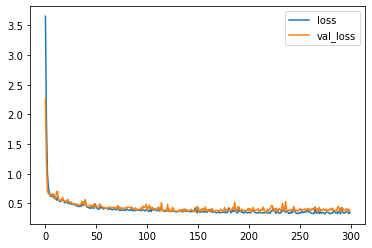

In [69]:
model_loss.plot()

In [70]:
from sklearn.metrics import confusion_matrix,classification_report

In [75]:
y_pred=model.predict_classes(X_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [76]:
y_pred

array([[1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
    

In [77]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.83      0.81       113
           1       0.88      0.85      0.86       163

    accuracy                           0.84       276
   macro avg       0.83      0.84      0.84       276
weighted avg       0.84      0.84      0.84       276



In [78]:
print(confusion_matrix(y_test,y_pred))

[[ 94  19]
 [ 25 138]]


In [79]:
from tensorflow.keras.layers import Dropout

In [80]:
model = Sequential()

model.add(Dense(units=30,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=15,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam')

In [84]:
model.fit(X_train,y_train, epochs=500, validation_data=(X_test,y_test),verbose=1)

Epoch 1/500
21/21 [==============================] - 0s 14ms/step - loss: 28.8334 - val_loss: 11.7277
Epoch 2/500
21/21 [==============================] - 0s 3ms/step - loss: 22.9094 - val_loss: 7.0709
Epoch 3/500
21/21 [==============================] - 0s 4ms/step - loss: 17.3912 - val_loss: 4.3271
Epoch 4/500
21/21 [==============================] - 0s 4ms/step - loss: 11.7631 - val_loss: 1.9469
Epoch 5/500
21/21 [==============================] - 0s 4ms/step - loss: 9.7499 - val_loss: 1.3703
Epoch 6/500
21/21 [==============================] - 0s 4ms/step - loss: 8.1458 - val_loss: 1.2314
Epoch 7/500
21/21 [==============================] - 0s 4ms/step - loss: 6.1992 - val_loss: 1.8572
Epoch 8/500
21/21 [==============================] - 0s 3ms/step - loss: 5.6508 - val_loss: 1.6951
Epoch 9/500
21/21 [==============================] - 0s 4ms/step - loss: 4.0414 - val_loss: 1.2718
Epoch 10/500
21/21 [==============================] - 0s 3ms/step - loss: 3.3233 - val_loss: 0.8783
Epo

Epoch 83/500
21/21 [==============================] - 0s 5ms/step - loss: 0.7013 - val_loss: 0.6821
Epoch 84/500
21/21 [==============================] - 0s 5ms/step - loss: 0.6963 - val_loss: 0.6829
Epoch 85/500
21/21 [==============================] - 0s 5ms/step - loss: 0.6885 - val_loss: 0.6813
Epoch 86/500
21/21 [==============================] - 0s 6ms/step - loss: 0.6799 - val_loss: 0.6812
Epoch 87/500
21/21 [==============================] - 0s 6ms/step - loss: 0.6982 - val_loss: 0.6795
Epoch 88/500
21/21 [==============================] - 0s 6ms/step - loss: 0.6769 - val_loss: 0.6782
Epoch 89/500
21/21 [==============================] - 0s 6ms/step - loss: 0.6769 - val_loss: 0.6788
Epoch 90/500
21/21 [==============================] - 0s 6ms/step - loss: 0.6691 - val_loss: 0.6781
Epoch 91/500
21/21 [==============================] - 0s 6ms/step - loss: 0.6794 - val_loss: 0.6779
Epoch 92/500
21/21 [==============================] - 0s 6ms/step - loss: 0.6729 - val_loss: 0.6797


21/21 [==============================] - 0s 6ms/step - loss: 0.6686 - val_loss: 0.6511
Epoch 165/500
21/21 [==============================] - 0s 5ms/step - loss: 0.6553 - val_loss: 0.6480
Epoch 166/500
21/21 [==============================] - 0s 6ms/step - loss: 0.6650 - val_loss: 0.6448
Epoch 167/500
21/21 [==============================] - 0s 6ms/step - loss: 0.6676 - val_loss: 0.6454
Epoch 168/500
21/21 [==============================] - 0s 6ms/step - loss: 0.6608 - val_loss: 0.6477
Epoch 169/500
21/21 [==============================] - 0s 5ms/step - loss: 0.6921 - val_loss: 0.6450
Epoch 170/500
21/21 [==============================] - 0s 6ms/step - loss: 0.6558 - val_loss: 0.6503
Epoch 171/500
21/21 [==============================] - 0s 6ms/step - loss: 0.6610 - val_loss: 0.6493
Epoch 172/500
21/21 [==============================] - 0s 5ms/step - loss: 0.6617 - val_loss: 0.6514
Epoch 173/500
21/21 [==============================] - 0s 5ms/step - loss: 0.6682 - val_loss: 0.6507
Epoc

21/21 [==============================] - 0s 3ms/step - loss: 0.6256 - val_loss: 0.5801
Epoch 246/500
21/21 [==============================] - 0s 3ms/step - loss: 0.6350 - val_loss: 0.5915
Epoch 247/500
21/21 [==============================] - 0s 4ms/step - loss: 0.6390 - val_loss: 0.5843
Epoch 248/500
21/21 [==============================] - 0s 3ms/step - loss: 0.6349 - val_loss: 0.5761
Epoch 249/500
21/21 [==============================] - 0s 4ms/step - loss: 0.6395 - val_loss: 0.5791
Epoch 250/500
21/21 [==============================] - 0s 3ms/step - loss: 0.6427 - val_loss: 0.5765
Epoch 251/500
21/21 [==============================] - 0s 3ms/step - loss: 0.6337 - val_loss: 0.5710
Epoch 252/500
21/21 [==============================] - 0s 3ms/step - loss: 0.6292 - val_loss: 0.5704
Epoch 253/500
21/21 [==============================] - 0s 3ms/step - loss: 0.6500 - val_loss: 0.5777
Epoch 254/500
21/21 [==============================] - 0s 3ms/step - loss: 0.6271 - val_loss: 0.5665
Epoc

21/21 [==============================] - 0s 4ms/step - loss: 0.5673 - val_loss: 0.4690
Epoch 327/500
21/21 [==============================] - 0s 3ms/step - loss: 0.5573 - val_loss: 0.4682
Epoch 328/500
21/21 [==============================] - 0s 4ms/step - loss: 0.5578 - val_loss: 0.4882
Epoch 329/500
21/21 [==============================] - 0s 3ms/step - loss: 0.5451 - val_loss: 0.4695
Epoch 330/500
21/21 [==============================] - 0s 4ms/step - loss: 0.5737 - val_loss: 0.4709
Epoch 331/500
21/21 [==============================] - 0s 4ms/step - loss: 0.5479 - val_loss: 0.4670
Epoch 332/500
21/21 [==============================] - 0s 3ms/step - loss: 0.5739 - val_loss: 0.4862
Epoch 333/500
21/21 [==============================] - 0s 3ms/step - loss: 0.5628 - val_loss: 0.4751
Epoch 334/500
21/21 [==============================] - 0s 4ms/step - loss: 0.5554 - val_loss: 0.4663
Epoch 335/500
21/21 [==============================] - 0s 3ms/step - loss: 0.5683 - val_loss: 0.4843
Epoc

21/21 [==============================] - 0s 6ms/step - loss: 0.5467 - val_loss: 0.4328
Epoch 408/500
21/21 [==============================] - 0s 6ms/step - loss: 0.5279 - val_loss: 0.4571
Epoch 409/500
21/21 [==============================] - 0s 6ms/step - loss: 0.5273 - val_loss: 0.4293
Epoch 410/500
21/21 [==============================] - 0s 6ms/step - loss: 0.5290 - val_loss: 0.4245
Epoch 411/500
21/21 [==============================] - 0s 6ms/step - loss: 0.5535 - val_loss: 0.4347
Epoch 412/500
21/21 [==============================] - 0s 6ms/step - loss: 0.5268 - val_loss: 0.4407
Epoch 413/500
21/21 [==============================] - 0s 5ms/step - loss: 0.5409 - val_loss: 0.4412
Epoch 414/500
21/21 [==============================] - 0s 5ms/step - loss: 0.5230 - val_loss: 0.4389
Epoch 415/500
21/21 [==============================] - 0s 5ms/step - loss: 0.5344 - val_loss: 0.4446
Epoch 416/500
21/21 [==============================] - 0s 5ms/step - loss: 0.5456 - val_loss: 0.4261
Epoc

21/21 [==============================] - 0s 4ms/step - loss: 0.5344 - val_loss: 0.4140
Epoch 489/500
21/21 [==============================] - 0s 4ms/step - loss: 0.5353 - val_loss: 0.4040
Epoch 490/500
21/21 [==============================] - 0s 4ms/step - loss: 0.5257 - val_loss: 0.4142
Epoch 491/500
21/21 [==============================] - 0s 4ms/step - loss: 0.5136 - val_loss: 0.4151
Epoch 492/500
21/21 [==============================] - 0s 4ms/step - loss: 0.5363 - val_loss: 0.4408
Epoch 493/500
21/21 [==============================] - 0s 5ms/step - loss: 0.5267 - val_loss: 0.4229
Epoch 494/500
21/21 [==============================] - 0s 6ms/step - loss: 0.5622 - val_loss: 0.4349
Epoch 495/500
21/21 [==============================] - 0s 6ms/step - loss: 0.4793 - val_loss: 0.4090
Epoch 496/500
21/21 [==============================] - 0s 6ms/step - loss: 0.5056 - val_loss: 0.4332
Epoch 497/500
21/21 [==============================] - 0s 5ms/step - loss: 0.5304 - val_loss: 0.4171
Epoc

In [85]:
model_loss_drop=pd.DataFrame(model.history.history)

<AxesSubplot:>

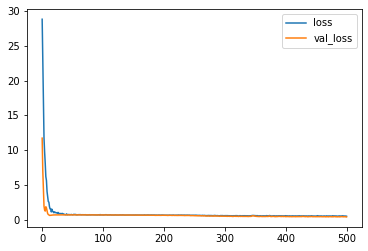

In [86]:
model_loss_drop.plot()

In [87]:
predictions=model.predict_classes(X_test)

In [88]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.79      0.82      0.81       113
           1       0.87      0.85      0.86       163

    accuracy                           0.84       276
   macro avg       0.83      0.83      0.83       276
weighted avg       0.84      0.84      0.84       276



In [89]:
print(confusion_matrix(y_test,predictions))

[[ 93  20]
 [ 25 138]]
